# Enunciado
  1 - Um fazendeiro tem 200ha de terra, onde planeja plantar trigo, arroz e milho. A produção esperada, em $\text{Kg}$ por hectare plantada, é de $1800$, $2100$ e $2900$ para trigo, arroz e milho, respectivamente. Para atender ao consumo interno da fazenda, ele deve plantar pelo menos $12\text{ha}$ de trigo, $16\text{ha}$ de arroz e $20\text{ha}$ de milho. Ele tem condição de armazenar no máximo $700\text{t}$ de grãos. Sabendo que o trigo dá um lucro de $\text{R}\$1,20$ por $\text{Kg}$, o arroz de $60$ centavos por $\text{Kg}$ e o milho de $28$ centavos por $\text{Kg}$, elabore um modelo de $\text{PL}$ para planejar o plantio do fazendeiro que forneça o lucro máximo.

# Modelo Lucro_Fazenda_Escalavel

      Maximize
        2160 Hectares[Trigo] + 1260 Hectares[Arroz] + 812 Hectares[Milho]
      Subject To
      Limite_Terra: Hectares[Trigo] + Hectares[Arroz] + Hectares[Milho] <= 200
      Capacidade_Armazenamento: 1800 Hectares[Trigo] + 2100 Hectares[Arroz]
        + 2900 Hectares[Milho] <= 700000
      Minimo_Trigo: Hectares[Trigo] >= 12
      Minimo_Arroz: Hectares[Arroz] >= 16
      Minimo_Milho: Hectares[Milho] >= 20
      Bounds
      End


In [ ]:
import gurobipy as gp
from gurobipy import GRB

#  1.Dados do Problema 

culturas = ["Trigo", "Arroz", "Milho"]
dados_cultura = {
    "Producao_kg_ha": {"Trigo": 1800, "Arroz": 2100, "Milho": 2900},
    "Lucro_por_kg":   {"Trigo": 1.20, "Arroz": 0.60, "Milho": 0.28},
    "Minimo_ha":      {"Trigo": 12,   "Arroz": 16,   "Milho": 20},
}
total_terra_ha = 200
capacidade_armazenamento_kg = 700000
lucro_por_ha = {c: dados_cultura["Producao_kg_ha"][c] * dados_cultura["Lucro_por_kg"][c] for c in culturas}

try:
    # 2. Criar e Construir o Modelo 
    modelo = gp.Model("Lucro_Fazenda_Escalavel")
    hectares = modelo.addVars(culturas, name="Hectares")
    lucro_total = gp.quicksum(lucro_por_ha[c] * hectares[c] for c in culturas)
    modelo.setObjective(lucro_total, GRB.MAXIMIZE)
    modelo.addConstr(gp.quicksum(hectares[c] for c in culturas) <= total_terra_ha, "Limite_Terra")
    producao_total = gp.quicksum(dados_cultura["Producao_kg_ha"][c] * hectares[c] for c in culturas)
    modelo.addConstr(producao_total <= capacidade_armazenamento_kg, "Capacidade_Armazenamento")
    for c in culturas:
        modelo.addConstr(hectares[c] >= dados_cultura["Minimo_ha"][c], f"Minimo_{c}")

   
    # 6. Otimizar o Modelo 
    modelo.optimize()

    # 7.  Resultados 
    
    print("\n" + "="*60)
    print("         RESULTADO DA OTIMIZAÇÃO PARA O PLANTIO ")
    print("="*60)

    if modelo.status == GRB.OPTIMAL:
        print(f"\n Status da Otimização: Solução ótima encontrada!")
        print(f" Lucro Máximo a ser obtido: R$ {modelo.objVal:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
        
        print("\n Plano de Plantio Ideal:")
        # Laço 'for' para exibir o resultado de cada variável
        for c in culturas:
            print(f"  - {c:<5}: Plantar {hectares[c].X:>6.2f} hectares")

        # Cálculos totais usando expressões geradoras
        total_area_usada = sum(hectares[c].X for c in culturas)
        total_producao_kg = sum(dados_cultura["Producao_kg_ha"][c] * hectares[c].X for c in culturas)

        print(f"\n   Total de área utilizada: {total_area_usada:.2f} / {total_terra_ha:.2f} ha")
        print(f"   Produção total de grãos: {total_producao_kg:,.0f} / {capacidade_armazenamento_kg:,.0f} kg".replace(",", "."))

    else:
        print("\n Não foi encontrada uma solução ótima.")
        print(f"Status da Otimização: {modelo.status}")

    print("\n" + "="*60)
except gp.GurobiError as e:
    print(f"Erro no Gurobi [código {e.errno}]: {e}")

# Resultados 
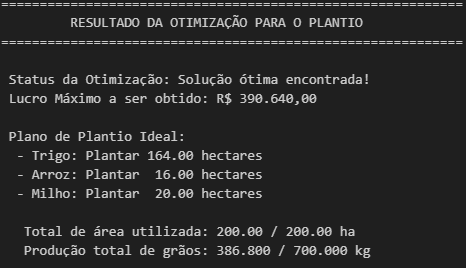